In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
fraud_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
fraud_data.head()

/kaggle/input/creditcardfraud/creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
for i, column in enumerate(fraud_data.columns):
    #if (i > 2 and i % 5 == 0) : break;
    plt.subplot(111)
    plt.hist(x=[fraud_data[fraud_data['Class'] == 1][column]],color=['r'])
    if i > 0 : 
    plt.xlabel(column + " value")
    plt.ylabel('fraud count')
    plt.legend()
    plt.show()
    plt.subplot(111)
    plt.hist(x=[fraud_data[column]],color=['g'])
    plt.title("general distribution at " +column )
    plt.show()
    

IndentationError: expected an indented block after 'if' statement on line 5 (3129902229.py, line 6)

In [57]:
n_class = fraud_data.iloc[:,fraud_data.columns == 'Class'].to_numpy().transpose()[0]
print(n_class)
x_withtime =  fraud_data.iloc[: , fraud_data.columns != 'Class']

x_normalized = (x_withtime - x_withtime.mean()) / x_withtime.std()
x_normalized.head()
x_withouttime = x_normalized.drop(columns=["Time"])

[0 0 0 ... 0 0 0]


In [69]:
from sklearn.cluster import KMeans
std = x_withtime.std()
class1 = KMeans(n_clusters=2,random_state=13066).fit(x_withtime)
class2 = KMeans(n_clusters=2,random_state=13066).fit(x_normalized)
class3 = KMeans(n_clusters=2,random_state=13066).fit(x_withouttime)
labels1 = class1.predict(x_withtime)
labels2 = class2.predict(x_normalized)
labels3 = class3.predict(x_withouttime)
x_normalized["Amount"]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0         0.244964
1        -0.342474
2         1.160684
3         0.140534
4        -0.073403
            ...   
284802   -0.350150
284803   -0.254116
284804   -0.081839
284805   -0.313248
284806    0.514354
Name: Amount, Length: 284807, dtype: float64

/tmp/ipykernel_42/4040761608.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


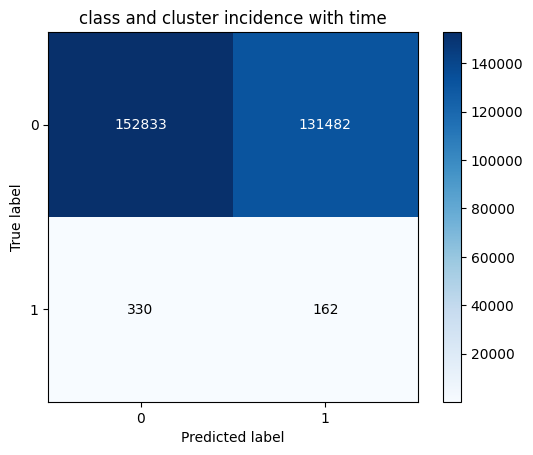

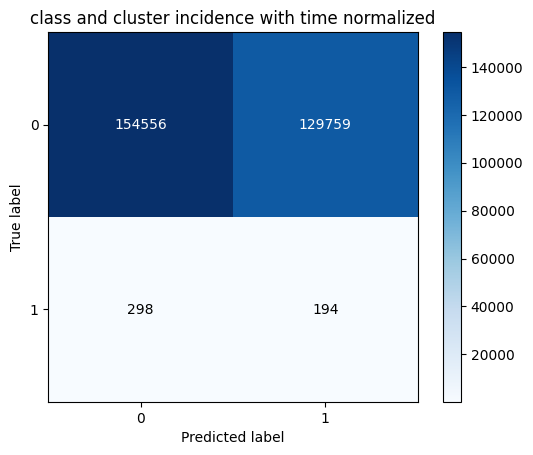

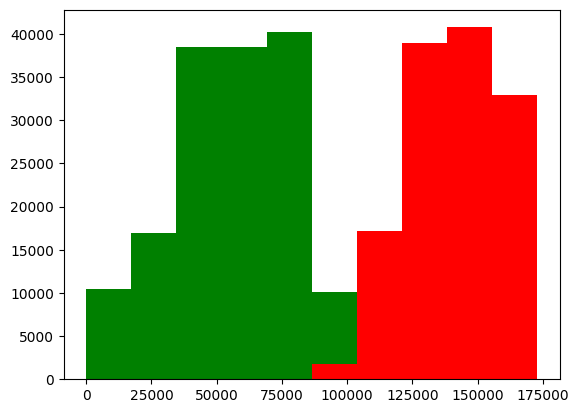

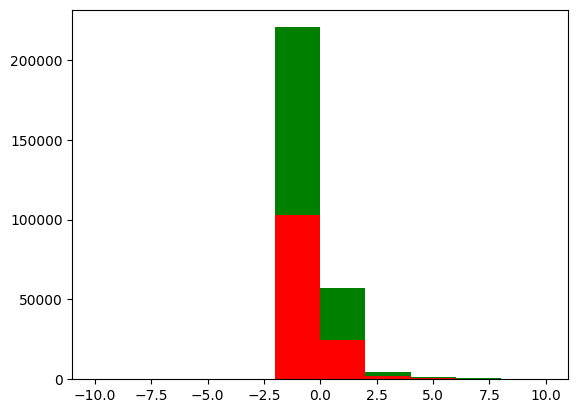

0         False
1         False
2         False
3         False
4         False
          ...  
284802     True
284803     True
284804     True
284805     True
284806     True
Length: 284807, dtype: bool

In [70]:
import scikitplot as skplt


skplt.metrics.plot_confusion_matrix(n_class,labels1, title = 'class and cluster incidence with time')
skplt.metrics.plot_confusion_matrix(n_class,labels2, title = 'class and cluster incidence with time normalized')
skplt.metrics.plot_confusion_matrix(n_class,labels3, title = 'class and cluster incidence without time normalized')

s1 = pd.Series(labels1,dtype='bool')
s2 = pd.Series(labels2,dtype='bool')
plt.subplot(111)
plt.hist(x=[fraud_data[s1]['Time'],fraud_data[s1== False]['Time']],color=['r','g'],stacked=True)
plt.show()
plt.subplot(111)
plt.hist(x=[x_normalized[s2]['Amount'],x_normalized[s2== False]['Amount']],color=['r','g'],stacked=True,range=(-10,10))
plt.show()
type(fraud_data["Class"] == 1)
pd.Series(labels1,dtype='bool')

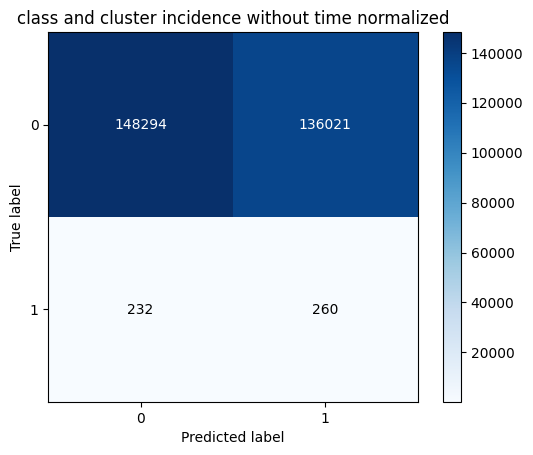

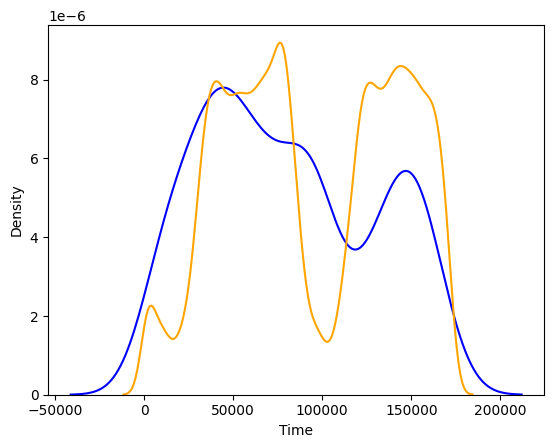

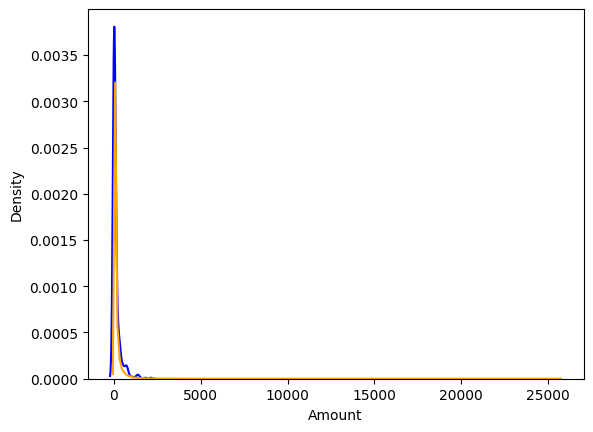

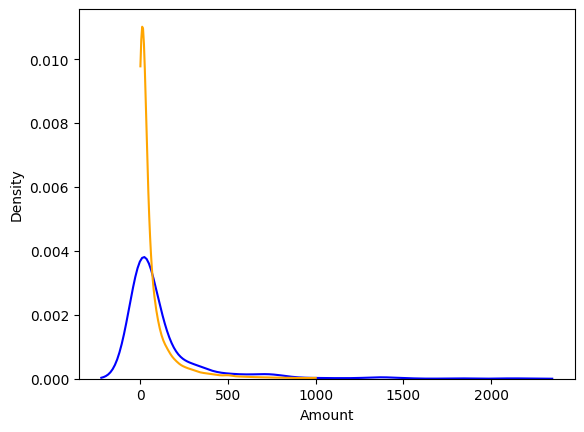

In [93]:
skplt.metrics.plot_confusion_matrix(n_class,labels3, title = 'class and cluster incidence without time normalized')
plt.show()
sns.kdeplot(fraud_data[fraud_data['Class'] == 1]['Time'],color='blue')
sns.kdeplot(fraud_data['Time'],color='orange')
plt.show()
sns.kdeplot(fraud_data[fraud_data['Class'] == 1]['Amount'],color='blue')
sns.kdeplot(fraud_data['Amount'],color='orange')
plt.show()
sns.kdeplot(fraud_data[fraud_data['Class'] == 1]['Amount'],color='blue')
sns.kdeplot(fraud_data['Amount'],clip=(0,1000),color='orange')
plt.show()

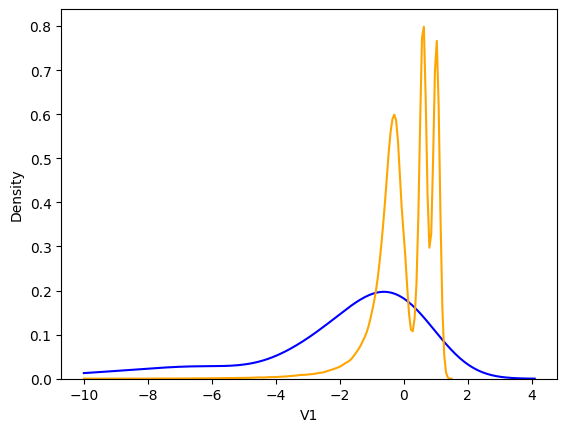

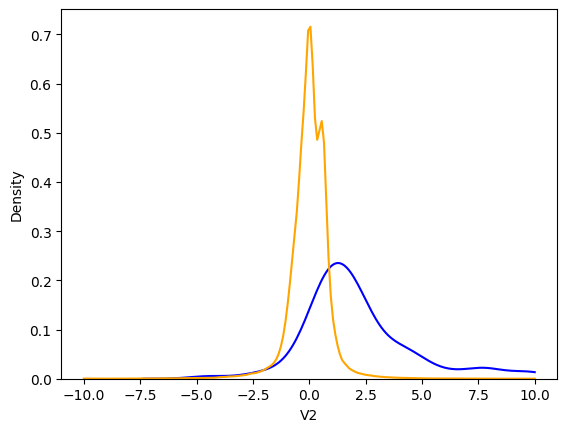

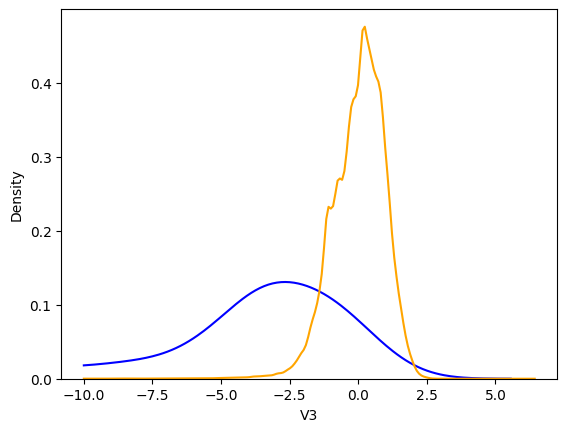

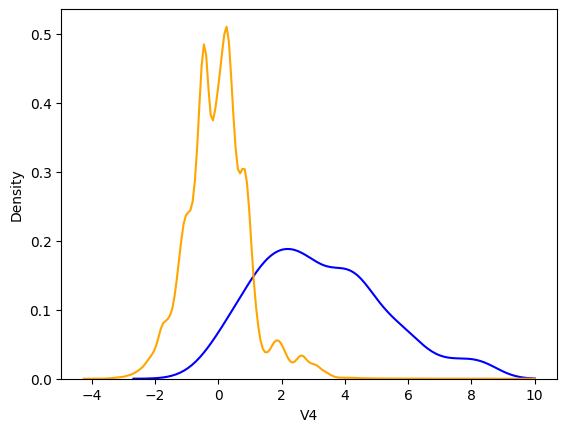

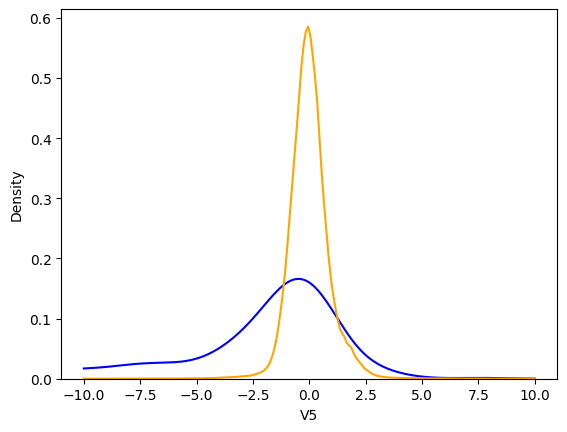

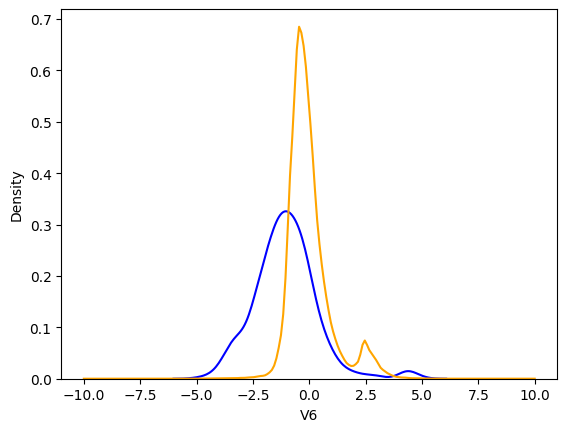

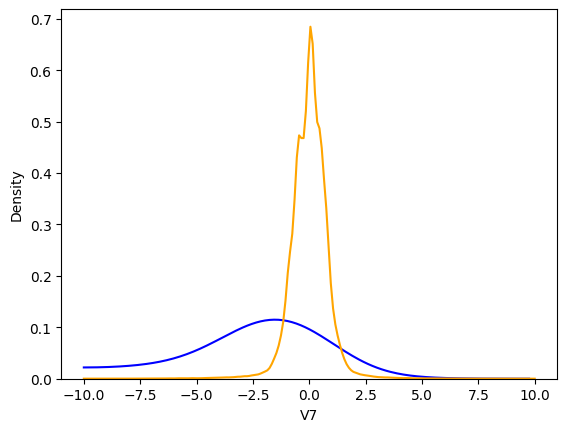

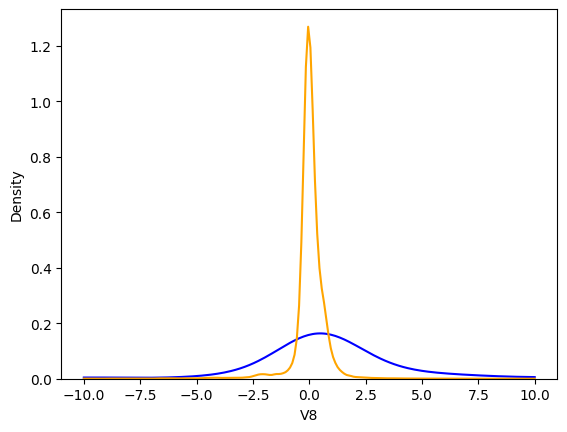

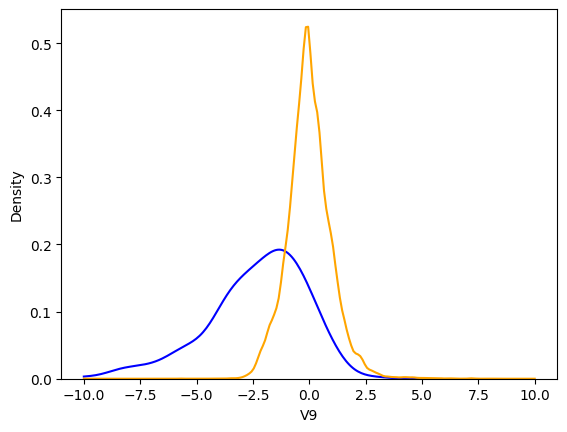

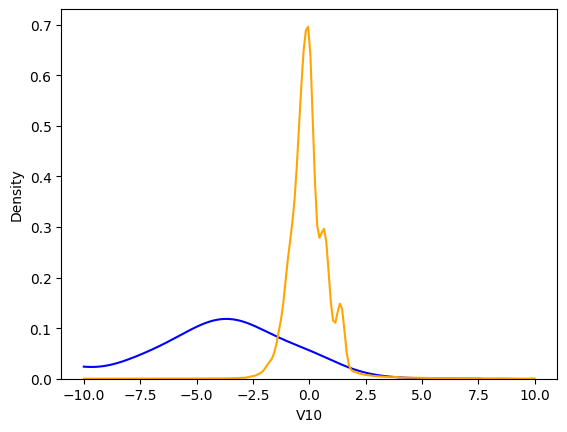

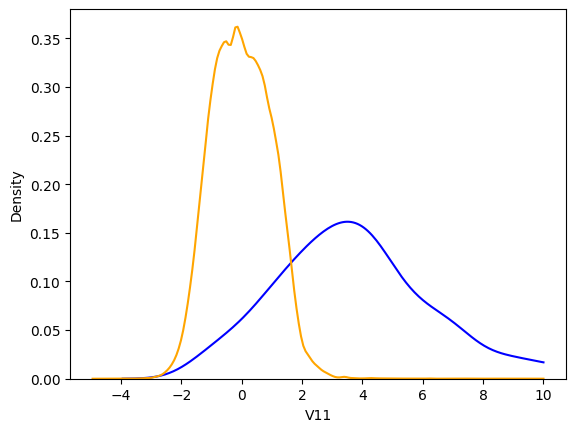

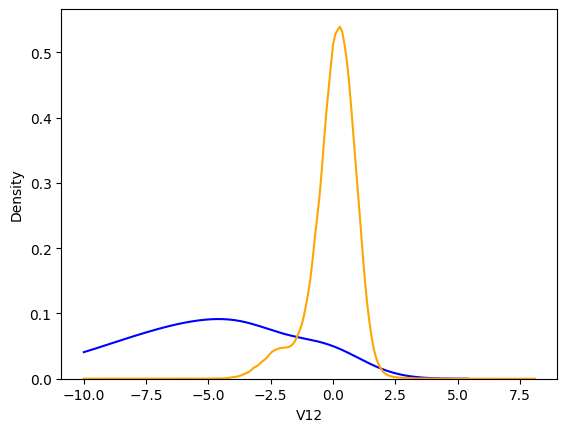

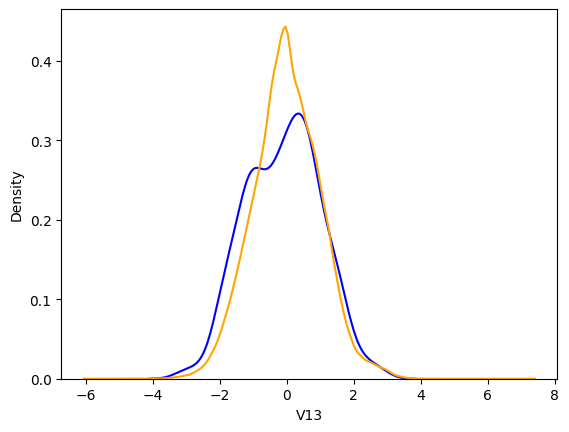

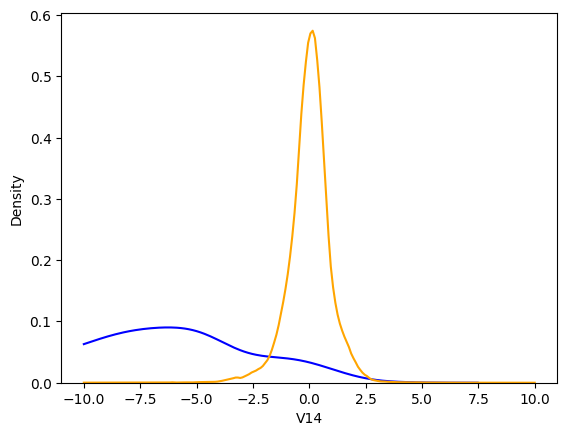

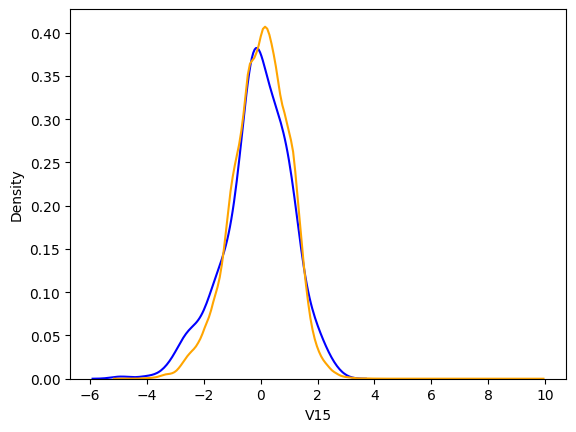

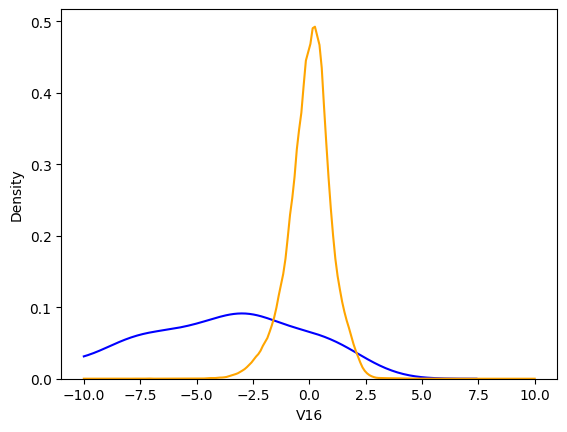

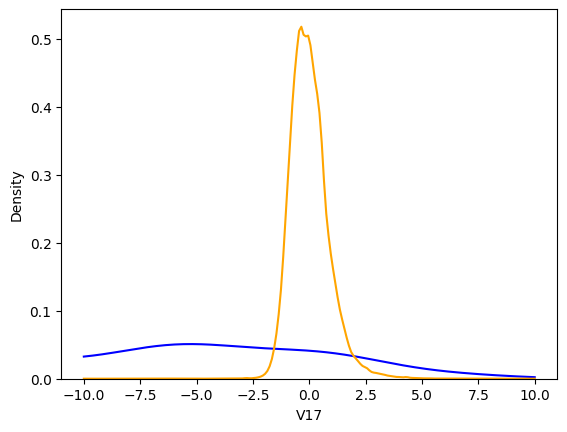

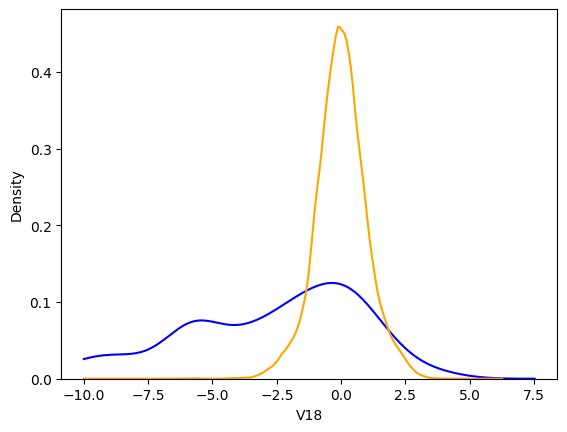

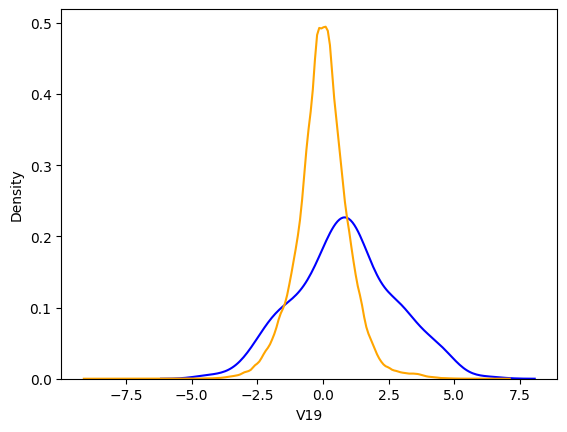

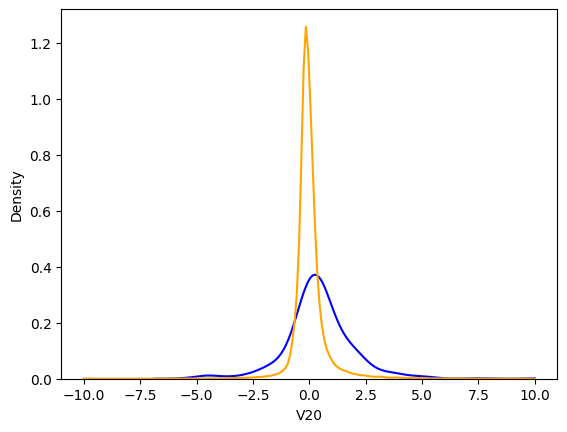

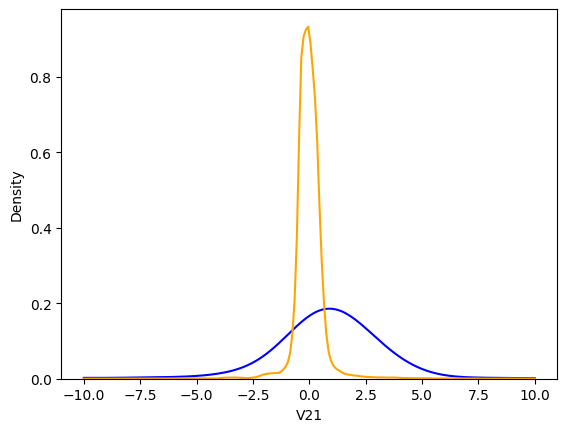

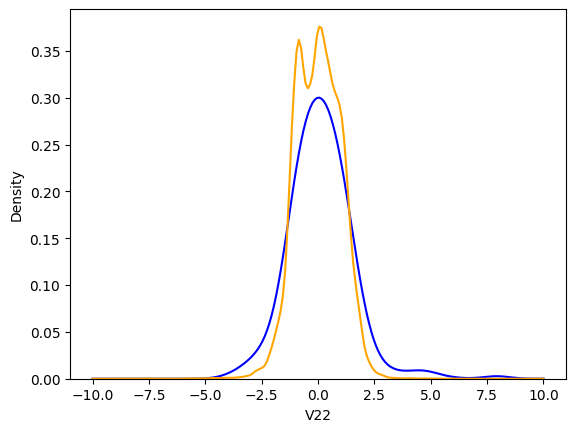

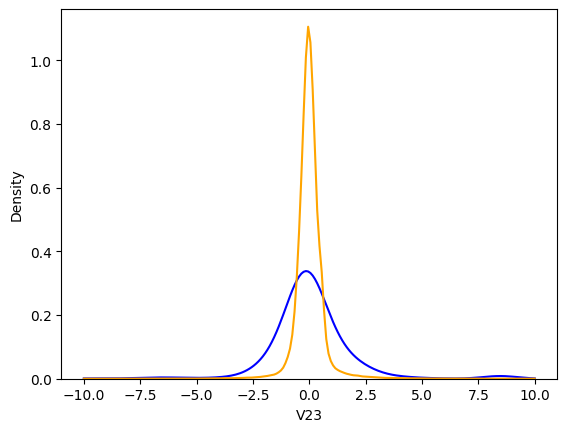

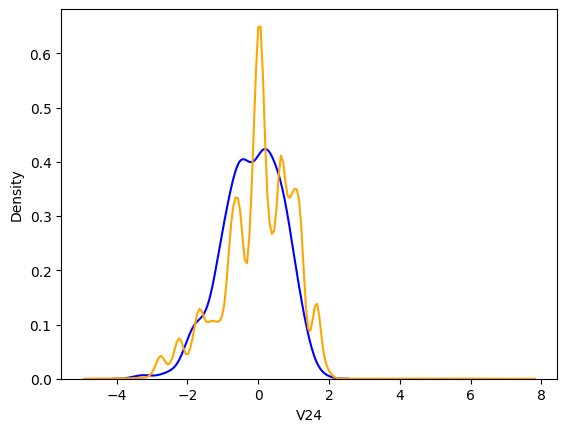

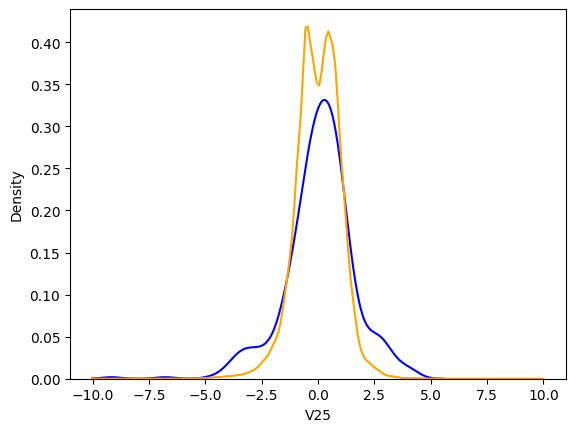

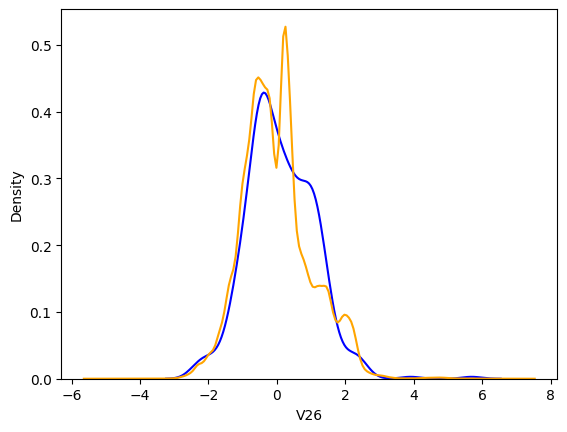

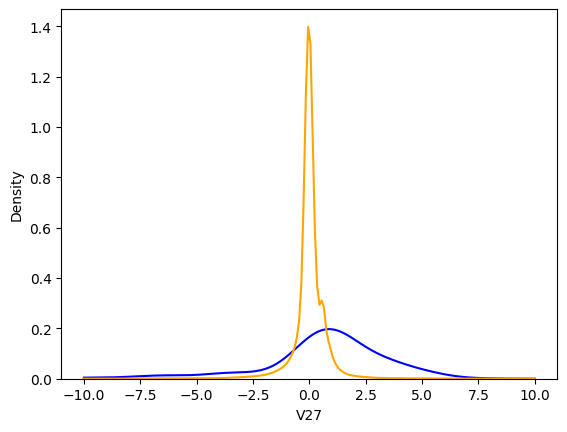

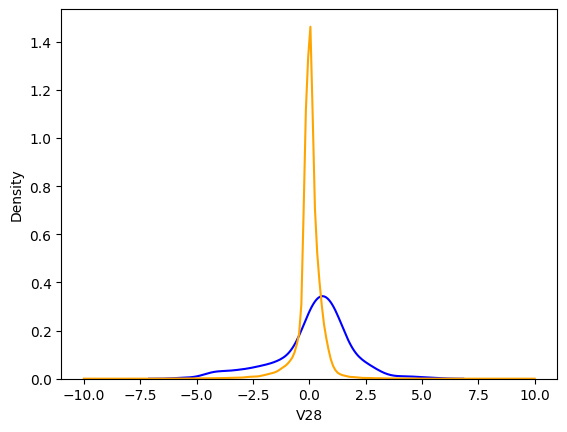

In [87]:
for i in range(1,29):
    sns.kdeplot(x_normalized[fraud_data['Class'] == 1][f'V{i}'],clip=(-10,10),color='blue')
    sns.kdeplot(x_normalized[f'V{i}'],clip=(-10,10),color='orange')
    plt.show()

In [ ]:
skplt.metrics.plot_confusion_matrix(n_class,labels3, title = 'class and cluster incidence without time normalized')
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,30))
rows = [f"V{i}" for i in range(1,15)]
rows2 = [f"V{i + 14}" for i in range(1,15)]
vp = axis1.violinplot(fraud_data[rows],showmedians=True,showmeans=True,showextrema=True,positions=range(1,15))
axis2.violinplot(fraud_data[rows2],showmedians=True,showmeans=True,showextrema=True,positions=range(15,29))
axis1.set(xlim = (0 ,15),ylim=(-20,20))
axis2.set(xlim = (14,29),ylim=(-20,20))
plt.show()

In [ ]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(10,20))
vp = axis1.violinplot(fraud_data[["Time"]],showmedians=True,showmeans=True,showextrema=True)
axis2.violinplot(fraud_data[["Amount"]],showmedians=True,showmeans=True,showextrema=True)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
print(n_class)
x_withtime
X_train ,X_test,y_train,y_test = train_test_split(x_withtime,n_class,test_size=0.2,random_state=13)

[0 0 0 ... 0 0 0]


In [110]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(),LinearSVC(dual=True, random_state=98,max_iter=1000))
clf.fit(X_train,y_train)
labels = clf.predict(X_test)
print(sum(labels))
print(labels)

73
[0 0 0 ... 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [111]:
#y2 = y_test.to_numpy().copy()

y2 = y_test
print(y2)
print(labels)
mistakes = np.logical_xor(y2,labels)
print(mistakes)
print(sum(mistakes))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[False False False ... False False False]
29


<Axes: title={'center': 'Confusion Matrix for our Prediction'}, xlabel='Predicted label', ylabel='True label'>

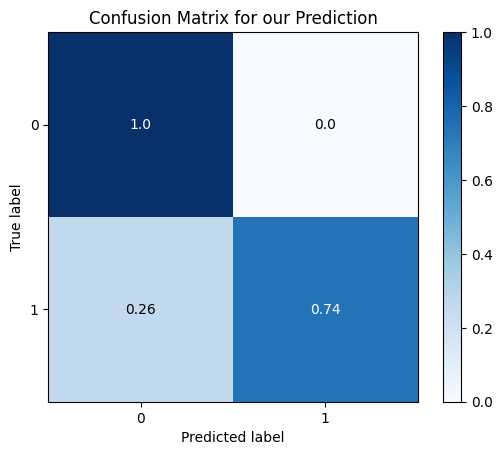

In [114]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y2,labels, normalize=True, title = 'Confusion Matrix for our Prediction')

In [113]:
labels = clf.predict(x)
print(labels)
y3 = y.to_numpy()
y3 = y3.transpose()
print(y3)
skplt.metrics.plot_confusion_matrix(y3[0],labels, normalize=True, title = 'Confusion Matrix for GBC')

NameError: name 'x' is not defined